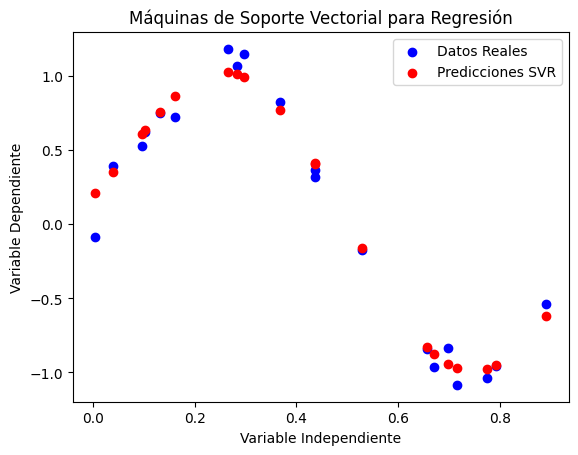

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Datos de ejemplo
np.random.seed(0)
X = np.sort(np.random.rand(100, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel() + np.random.randn(100) * 0.1

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Predicciones
y_pred = svr.predict(X_test)

# Gráfico de resultados
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones SVR')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.title('Máquinas de Soporte Vectorial para Regresión')
plt.legend()
plt.show()

Mejores parámetros:  {'C': 100, 'epsilon': 0.1, 'gamma': 1}


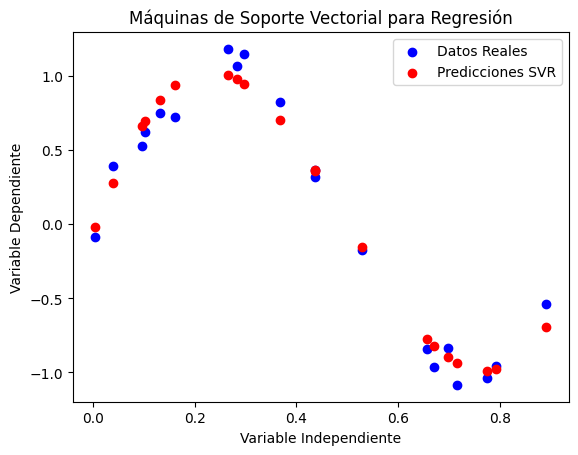

In [3]:
from sklearn.model_selection import GridSearchCV

# Definir los rangos de los parámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.2, 0.5, 1]
}

# Crear el modelo de SVR
svr = SVR(kernel='rbf')

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mejor combinación de parámetros
best_params = grid_search.best_params_
print("Mejores parámetros: ", best_params)

# Crear y ajustar el modelo con los mejores parámetros
svr_best = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
svr_best.fit(X_train, y_train)

# Predicciones con el modelo ajustado
y_pred_best = svr_best.predict(X_test)

# Gráfico de resultados
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.scatter(X_test, y_pred_best, color='red', label='Predicciones SVR')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.title('Máquinas de Soporte Vectorial para Regresión')
plt.legend()
plt.show()

Mejores parámetros:  {'C': 10, 'epsilon': 0.2, 'gamma': 1}


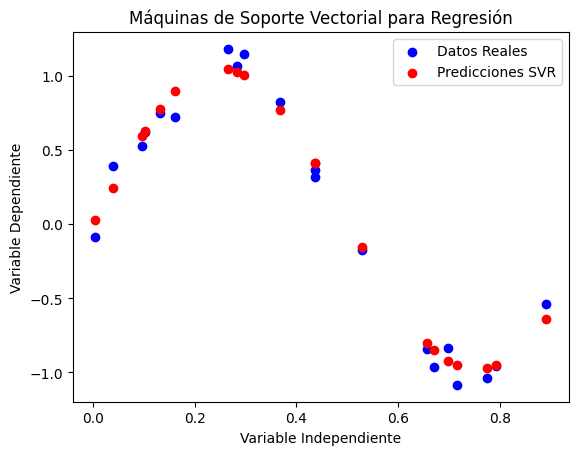

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Datos de ejemplo
np.random.seed(0)
X = np.sort(np.random.rand(100, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel() + np.random.randn(100) * 0.1

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Reshape para asegurar que los datos son 2D
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train).ravel()
y_test_scaled = scaler_y.transform(y_test).ravel()

# Definir los rangos de los parámetros para GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.2, 0.5, 1]
}

# Crear el modelo de SVR
svr = SVR(kernel='rbf')

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train_scaled)

# Mejor combinación de parámetros
best_params = grid_search.best_params_
print("Mejores parámetros: ", best_params)

# Crear y ajustar el modelo con los mejores parámetros
svr_best = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
svr_best.fit(X_train_scaled, y_train_scaled)

# Predicciones con el modelo ajustado
y_pred_scaled = svr_best.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Gráfico de resultados
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones SVR')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.title('Máquinas de Soporte Vectorial para Regresión')
plt.legend()
plt.show()